In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from scipy.stats import jarque_bera # jarque-bera testi yapmak için
from scipy.stats import normaltest  # normal testi yapmak için
from sklearn.preprocessing import normalize  # normal dağılmayan değişkenleri normalize etmek için
from sklearn.preprocessing import scale      # normalleştirdikten sonra standartlaştırmak için
import warnings
warnings.filterwarnings('ignore')

# Soru 1:
Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

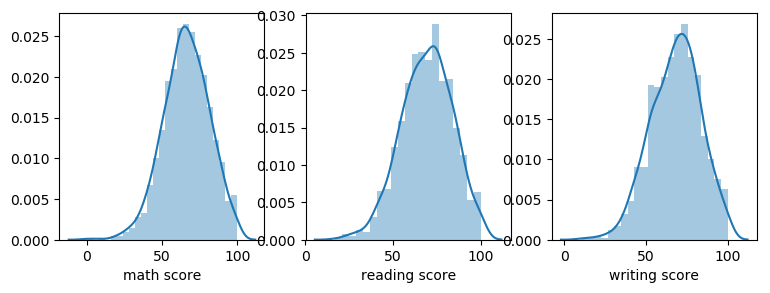

,variable,jarque-bera stats,jarque-bera p_value
0,math score,15.912257,0.000351
1,reading score,11.383301,0.003374
2,writing score,13.985094,0.000919


In [3]:
df=pd.read_csv('StudentsPerformance.csv', index_col=0)
df.head()df=pd.read_csv('StudentsPerformance.csv', index_col=0)

# öncelikle histogram grafiğiyle normal dağılıma benzeyip benzemediğini inceleyelim
plt.figure(figsize=(9,3),dpi=100)
column=["math score","reading score","writing score"]
for i in range(len(column)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[column[i]])
        
plt.show()

# Her 3 sürekli değişkenin histogram grafiğinin normal dağılıma yakın gösterdiği anlaşılmaktadır;
# Ancak emin olmak için, sürekli değişkenlerin normal dağılım olup olmadıklarını anlamak için scipy 
# kütüphanesinden jarque-bera ve normal testleri yapılır.

# JARQUE-BERA TEST

variable=["math score","reading score","writing score"]
distributions=pd.DataFrame(columns=["variable","jarque-bera stats","jarque-bera p_value"])

for i in range(len(variable)):
    jb=jarque_bera(df[variable[i]])
    distributions=distributions.append({'variable':variable[i],
                                       'jarque-bera stats':jb[0],
                                       'jarque-bera p_value':jb[1]}, ignore_index=True)
distributions

# H0= Veri normal dağılmaktadır
# HA= Veri normal dağılmamaktadır p<0.05

# Her 3 değişken için de p<0.05 olduğu için HA kabul edilir ve veriler normal dağılmamaktadır denir.

In [96]:
# NORMAL TEST:

variable=["math score","reading score","writing score"]
nt=pd.DataFrame(columns=["variable","normaltest_stats","normaltest_pvalue"])

for i in variable:
    norm_stats=normaltest(df[i]) #istatistik ve p değeri üretir
    nt=nt.append({"variable":i,
                 "normaltest_stats":norm_stats[0],
                 "normaltest_pvalue":norm_stats[1]}, ignore_index=True)
nt

# Normal test'te de görüldüğü gibi p<0.05 olduğu için HA kabul edilir.Yani datalar normal dağılmamaktadır

,variable,normaltest_stats,normaltest_pvalue
0,math score,15.408961,0.000451
1,reading score,11.117413,0.003854
2,writing score,13.606451,0.001110


Hem jarque-bera hem de normal test sonucunda p<0.05 olduğundan verilerin normal dağılmadığı anlaşılmıştır; verilerin makine öğrenmesinde kullanılabilmesi için normal dağılması gerekmektedir, bu yüzden verilerin normal dağılıma uygun olması için normalizasyon ve standardizasyon yapılmalıdır.

# Soru 2:
We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg_Exams,Avg_Series,normalize_avg_exams,Standard_avg_exams
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,NaN,0.033182,0.343574
1,female,group C,some college,standard,completed,69,90,88,82.333333,NaN,0.037596,1.021927
2,female,group B,master's degree,standard,none,90,95,93,92.666667,NaN,0.042314,1.747064
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,NaN,0.022527,-1.293830
4,male,group C,some college,standard,none,76,78,75,76.333333,NaN,0.034856,0.600881


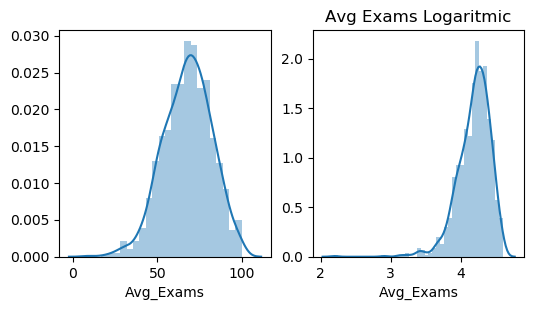

In [146]:
avg_exams=[]
for j in range(0,len(df)):
    avg_exams.append(np.mean([df["math score"][j], df["reading score"][j],df["writing score"][j]]))

df["Avg_Exams"]=avg_exams

display(df.reset_index().head())

plt.figure(figsize=(6,3),dpi=100)
plt.subplot(1,2,1)
plt.xlabel("Avg Exams")
sns.distplot(df["Avg_Exams"])

plt.subplot(1,2,2)
plt.title("Avg Exams Logaritmic")
sns.distplot(np.log(df["Avg_Exams"]));

# Ortalama sınavların histogram grafiği ile de logaritması alındıktan sonra da normal dağılım olmadığı görülmektedir; ancak
# Sınavların ortalamasının normal dağılım olup olmadığını kesin test etmek için jarque-bera testi yapalım:



In [148]:
# JARQUE-BERA TESTİ:

variable=["Avg_Exams"]
distributions=pd.DataFrame(columns=["variable","jarque_avg_stats","jarque_avg_pvalue"])

for i in range(len(variable)):
    jb=jarque_bera(df[variable[i]])
    distributions=distributions.append({"variable":variable[i],
                         "jarque_avg_stats":jb[0],
                         "jarque_avg_pvalue":jb[1]}, ignore_index=True)
distributions

# H0: Veriler normal dağılmaktadır
# H1: Veriler normal dağılmamaktadır
    
# p<0.05 olduğu için sınavların ortalamasının da normal dağılmadığı görülmüştür.



,variable,jarque_avg_stats,jarque_avg_pvalue
0,Avg_Exams,15.453388,0.000441


,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg_Exams,Avg_Series,normalize_avg_exams,Standard_avg_exams
gender,,,,,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74,72.666667,NaN,0.033182,0.343574
female,group C,some college,standard,completed,69,90,88,82.333333,NaN,0.037596,1.021927
female,group B,master's degree,standard,none,90,95,93,92.666667,NaN,0.042314,1.747064
male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,NaN,0.022527,-1.293830
male,group C,some college,standard,none,76,78,75,76.333333,NaN,0.034856,0.600881


Min of normalization exams's average:   0.004109661304911046
Max of normalization exams's average:   0.04566290338790051


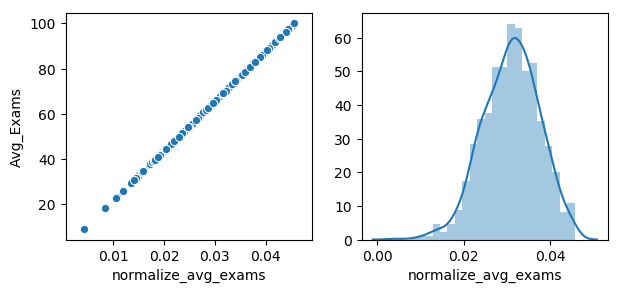

In [149]:
# NORMALIZATION:

df["normalize_avg_exams"]=normalize(np.array(df["Avg_Exams"]).reshape(1,-1)).reshape(-1,1)

display(df.head())

plt.figure(figsize=(7,3),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(df["normalize_avg_exams"],df["Avg_Exams"])

plt.subplot(1,2,2)
sns.distplot(df["normalize_avg_exams"])

# Normalleştirme işlemi bir değişkenin 0 ve 1 aralığında yeniden ölçeklendirilmesidir.
print("Min of normalization exams's average:  ",df["normalize_avg_exams"].min())
print("Max of normalization exams's average:  ",df["normalize_avg_exams"].max())

In [139]:
# STANDARDIZATION:

# Bir değişkenin ortalamasını 0, standart sapması 1 olarak standardize eder. scale() metodu kullanıldıktan sonra değişkenin
# ortalama ve standart sapması kontrol edilir.
df["Standard_avg_exams"]=scale(df["normalize_avg_exams"])

print("Std: ",df["Standard_avg_exams"].std())
print("Mean:",df["Standard_avg_exams"].mean())

Std:  1.0005003753127735
Mean: -3.785860513971784e-16


# Soru 3:
Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

,math score,reading score,writing score,Avg_Exams,Avg_Series,normalize_avg_exams,Standard_avg_exams
math score,1.000000,0.817580,0.802642,0.918746,NaN,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,NaN,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,NaN,0.965667,0.965667
Avg_Exams,0.918746,0.970331,0.965667,1.000000,NaN,1.000000,1.000000
Avg_Series,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalize_avg_exams,0.918746,0.970331,0.965667,1.000000,NaN,1.000000,1.000000
Standard_avg_exams,0.918746,0.970331,0.965667,1.000000,NaN,1.000000,1.000000


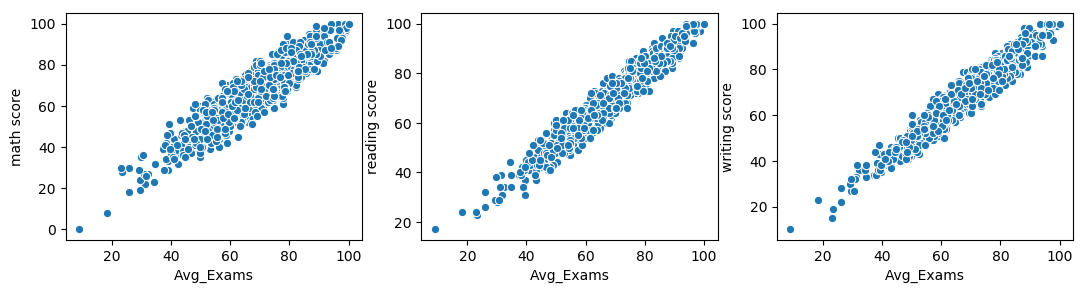

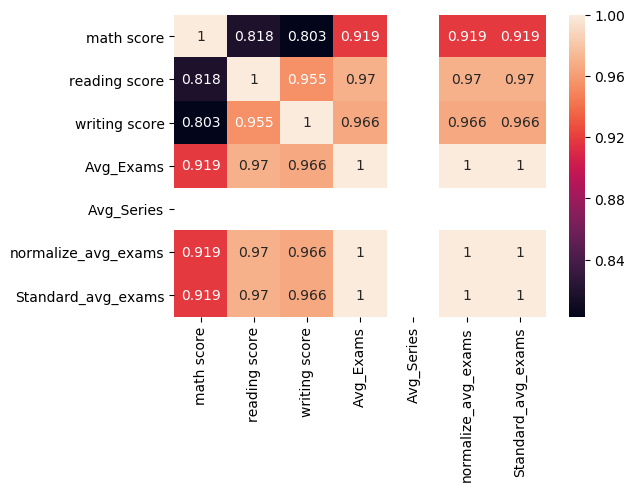

In [184]:
# Sürekli değişkenler arasındaki ilişki scatter plot ile ya da korelasyon ile bulunur.
# target variable = Avg_Exams

plt.figure(figsize=(13,3),dpi=100)
plt.subplot(1,3,1)
sns.scatterplot(df["Avg_Exams"],df["math score"])

plt.subplot(1,3,2)
sns.scatterplot(df["Avg_Exams"],df["reading score"])

plt.subplot(1,3,3)
sns.scatterplot(df["Avg_Exams"],df["writing score"]);

# Görsele baktığımızda reading ya da writing score un ortalama üzerinde daha fazla etkisini görmekteyiz; ancak kesin cevap
# verebilmek için korelasyonu incelememiz gerekir.

display(df.corr())
# Korelasyon tablosundan da anlaşıldığı gibi en yüksek ilişki(1' e yakın) ortalama sınav ile reading score arasındadır.

plt.figure(figsize=(6,4),dpi=100)
plt.subplot(1,1,1)
sns.heatmap(df.corr(), annot=True, fmt='.3g');

# Hedef değişken ile en çok ilişkide olan reading score değişkenini veri setinde tutmalıyız !!!

# Soru 4:
Does the test preparation course have an impact on the target variable you created?

Hedef değişken, 3 sınavın ortalamasıdır ve ortalama üzerinde en çok etkisi olan reading score dur